# Project: Investigate noshowappointments.csv

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<font size=4> In this poject, the No-show appointments dataset is analyzed. Two question is asked in this report: 1. How is the days between scheduled_day and appointment_day affecting if a patient will show up for the appointment? 2. How is the age and gender affecting if a patient will show up for the appointment? 

In [415]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

<font size=4> Frist of all the csv file is loaded and examined to understand the information contained in this dataset as well as the size of this dataset. Duplication is checked and none is found.</font>

In [306]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,"29,872,499,824,296.00",5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,"558,997,776,694,438.00",5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,"4,262,962,299,951.00",5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,"867,951,213,174.00",5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,"8,841,186,448,183.00",5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [307]:
df.duplicated().sum()

0

In [308]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,"110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00"
mean,"147,496,265,710,394.06","5,675,305.12",37.09,0.10,0.20,0.07,0.03,0.02,0.32
std,"256,094,920,291,739.09","71,295.75",23.11,0.30,0.40,0.26,0.17,0.16,0.47
min,"39,217.84","5,030,230.00",-1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"4,172,614,444,192.00","5,640,285.50",18.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"31,731,838,713,978.00","5,680,573.00",37.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"94,391,720,898,175.00","5,725,523.50",55.00,0.00,0.00,0.00,0.00,0.00,1.00
max,"999,981,631,772,427.00","5,790,484.00",115.00,1.00,1.00,1.00,1.00,4.00,1.00


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [310]:
df.shape

(110527, 14)

### Data Cleaning 

<font size=4>After inspection of the data, AppointmentID cloumns are dropped from the dataset as it's not going to provide much information for the distribution of the data. </font>

In [311]:
df.drop('AppointmentID', axis = 1, inplace = True)

<font size=4> The rest of the columns in the dataset are the ones that I want to work with. To make the future naming easier, all the names are converted to lower case and the same format.</font>

In [312]:
df.columns.str.lower()

Index(['patientid', 'gender', 'scheduledday', 'appointmentday', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [313]:
df.columns = ['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handcap', 'sms_received', 'no_show']

<font size=4> Examination of the patient_id shows that the unique number of id is smaller than the total number of entries meaning that multiple appointments are made by one patients. To work with the patient id, first the format needs to be changed to show the full id number. 

In [314]:
df.patient_id.nunique()

62299

In [315]:
pd.options.display.float_format = '{:20,.2f}'.format

[reference1](https://stackoverflow.com/questions/17737300/suppressing-scientific-notation-in-pandas/41023046)

In [316]:
df['patient_id'] = df.patient_id.astype(int)

<font size=4> Examination of the scheduled_day and appointment_day revealed that the type of the data is string and contains extra characters thus making it diffcult to work with. To better work with the time both scheduled_day and appointment_day  were coverted to datetime. For the scheduled_day the exact hour is omitted to keep consistency with  appointment_day and to make it easier to read.</font>

In [317]:
df.scheduled_day = pd.to_datetime(df.scheduled_day)

In [318]:
df.appointment_day = pd.to_datetime(df.appointment_day)

In [319]:
df.scheduled_day = df.scheduled_day.apply(lambda x:x.date())

[reference2](https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime)

In [320]:
df.scheduled_day = pd.to_datetime(df.scheduled_day)

<font size=4> A new column time_gap is made to identify the days between scheduled_day and appointment_day. A closer look at this new columns shows that five entries contain time_gap that is less than 0. This is impossible and might be due to miss typing. For this reason, these rows are omitted.

In [321]:
df['time_gap'] = (df.appointment_day - df.scheduled_day).astype('timedelta64[h]') / 24

[reference3](https://stackoverflow.com/questions/46222988/getting-difference-in-two-datetime-columns-in-pandas-dataframe)

In [322]:
df[df['time_gap'] < 0].index

Int64Index([27033, 55226, 64175, 71533, 72362], dtype='int64')

In [323]:
df.drop(df[df['time_gap'] < 0].index, axis = 0, inplace= True)

In [324]:
df[df['time_gap'] < 0]

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time_gap


<font size=4> Examination of the columns scholarship, sms_received, hipertension, diabetes, alcoholism reveals that these columns onlu consist of value 0 and 1, representing False and True. In this case, these columns are changed to boolean with 0 represented by False and 1 represented by True. </font>

In [325]:
df.scholarship.value_counts()

0    99661
1    10861
Name: scholarship, dtype: int64

In [326]:
df.sms_received.value_counts()

0    75040
1    35482
Name: sms_received, dtype: int64

In [327]:
df.hipertension.value_counts()

0    88721
1    21801
Name: hipertension, dtype: int64

In [328]:
df.diabetes.value_counts()

0    102579
1      7943
Name: diabetes, dtype: int64

In [329]:
df.alcoholism.value_counts()

0    107162
1      3360
Name: alcoholism, dtype: int64

In [330]:
df.alcoholism = df['alcoholism'] == 1

In [331]:
columns = ['scholarship', 'sms_received', 'hipertension', 'diabetes']

for c in columns:
    df[c] = df[c] == 1

<font size=4><span style="color:red">Examinnation of the age reveals that the age contains some negatuve values which is unlikely, those values are omitted.</font>

In [332]:
to_drop = df.query('age < 0')

In [333]:
df.drop(to_drop.index, axis = 0, inplace = True)

[reference4](https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe)

<a id='eda'></a>
## Exploratory Data Analysis

<font size=4> First for the better analysis of the data, missed and showed are defined as a series of boolean.

In [334]:
missed = df['no_show'] == 'Yes'
showed = df['no_show'] == 'No'

### 1. How is the days between scheduled_day and appointment_day affecting if a patient will show up for the appointment?

<font size=4> First the time_gap is examined and it's found that the mean time_gap is 10 days with the maximum being 179 days.

In [335]:
df.time_gap.describe()

count             110,521.00
mean                   10.18
std                    15.26
min                     0.00
25%                     0.00
50%                     4.00
75%                    15.00
max                   179.00
Name: time_gap, dtype: float64

<font size=4> The average time_gap for missed appointments is 15.8 days while for the showed appointments the value is 8.8 days. This means that there is a correlation between the time_gap and the tendency to show up for the appointment. Teh patients who missed the appointment have a higher time_gap than those that showed up for the appointments. 

In [336]:
print (df.time_gap[missed].mean())
print (df.time_gap[showed].mean())

15.835484449224701
8.754758692620767


<font size=4> From the following the proportion of missed appointments against all appointments is calculated. For around 20% of the appointments the patients didn't show up.

In [337]:
print (df.no_show[missed].count())
print (df.no_show.count())
print (df.no_show[missed].count() / df.no_show.count())

22314
110521
0.2018982817745044


<font size=4> In the following sections, the time_gap are divided into four areas ['0', '1-4', '5-15', '15-179']. In each of these areas, the proportion of people who missed the appointments are calculated.

In [338]:
print (df.query('time_gap == 0')[missed].count().no_show)
total_25 = df.query('time_gap == 0').count().no_show
print (total_25)
prop_25 = df.query('time_gap == 0')[missed].count().no_show / total_25
print (prop_25)

1792
38562
0.046470618743841084


/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [339]:
print (df.query('time_gap <= 4 & time_gap > 0')[missed].count().no_show)
total_50 = df.query('time_gap <= 4 & time_gap > 0').count().no_show
print (total_50)
prop_50 = df.query('time_gap <= 4 & time_gap > 0')[missed].count().no_show / total_50
print (prop_50)

4590
19965
0.2299023290758828


/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [340]:
print (df.query('time_gap > 4 & time_gap <= 15')[missed].count().no_show)
total_75 = df.query('time_gap > 4 & time_gap <= 15').count().no_show
print (total_75)
prop_75 = df.query('time_gap > 4 & time_gap <= 15')[missed].count().no_show / total_75
print (prop_75)

7348
25748
0.2853813888457356


/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [341]:
print (df.query('time_gap > 15')[missed].count().no_show)
total_100 = df.query('time_gap > 15').count().no_show
print (total_100)
prop_100 = df.query('time_gap > 15')[missed].count().no_show / total_100
print (prop_100)

/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


8584
26246
0.3270593614265031


/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<font size=4> Below the bar chart of the no show proportion versus gap days between scheduled day and appointment day is drawn. From this graph it's apparent that when the appointment day is further away from the scheduled day, the no_show value is increasing. This is reasonable as the further the appointment day is in the future, the more likely people will forget about the appointment.

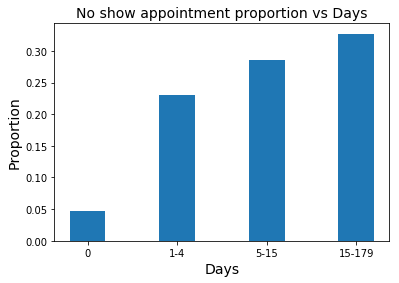

In [342]:
loc = np.arange(4)
width = 0.4
labels = ['0', '1-4', '5-15', '15-179']
plt.bar(loc, [prop_25, prop_50, prop_75, prop_100], width)
plt.xlabel('Days', size = 14)
plt.ylabel('Proportion', size = 14)
plt.title('No show appointment proportion vs Days', size = 14)
plt.xticks(loc, labels);

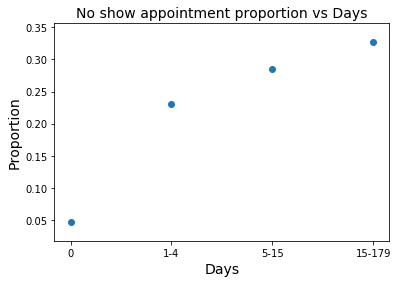

In [343]:
loc = np.arange(4)
labels = ['0', '1-4', '5-15', '15-179']
plt.scatter(loc, [prop_25, prop_50, prop_75, prop_100])
plt.xlabel('Days', size = 14)
plt.ylabel('Proportion', size = 14)
plt.title('No show appointment proportion vs Days', size = 14)
plt.xticks(loc, labels);

###  2. How is the age and gender affecting if a patient will show up for the appointment?

<font size=4> To probe that, first the total number of female and male patients are examined and it's found that much more female is scheduled than male.</font>

In [344]:
df.gender.value_counts()

F    71836
M    38685
Name: gender, dtype: int64

<font size=4>  The number of male and female that missed the appointment are counted and plotted as a bar chart. It can be found from the following bar chart that the total number of female who missed the appointment is much higher than male. However, as the number of female patients are higher that the male, this is not surprising. To make a better correlation of no show vs gender,  the proportion of the people who missed the appointment should be examined rather than the total number.</font>


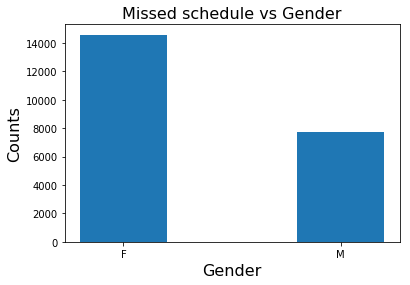

In [345]:
missed_counts = df.gender[missed].value_counts()
loc = [1,2]
width = 0.4
fig = plt.figure(figsize=(6,4))
plt.bar(loc, missed_counts, width)
plt.xlabel('Gender', size = 16)
plt.ylabel('Counts', size =16)
plt.title('Missed schedule vs Gender', size = 16)
plt.xticks(loc, ['F', 'M']);

<font size=4> The proportion of female and male patients who missed the appointment is calculated</font>


In [346]:
df_missed_m = df.query('gender == "M"')[missed]
df_missed_m_prop = df_missed_m.gender.count() / df.query('gender == "M"').gender.count()
df_missed_m_prop

/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0.19963810262375598

In [347]:
df_missed_f = df.query('gender == "F"')[missed]
df_missed_f_prop = df_missed_f.gender.count() / df.query('gender == "F"').gender.count()
df_missed_f_prop

/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0.2031154295896208

<font size=4> The bar chart of the proportion of female and male patients who missed the appointment is plotted. From the following bar chart we can see that the proportion of female and male patients who didn't show up for the appointment is almost the same, therefore it suggests that the gender is not related to the missing of appointment.</font>


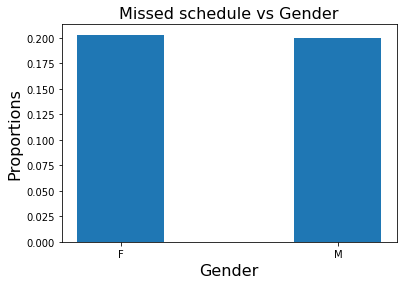

In [348]:
width = 0.4
loc = [1,2]
plt.bar(loc, [df_missed_f_prop, df_missed_m_prop], width)
plt.xlabel('Gender', size = 16)
plt.ylabel('Proportions', size =16)
plt.title('Missed schedule vs Gender', size = 16)
plt.xticks(loc, ['F', 'M']);

<font size=4><span style="color:red"> The bar chart of the proportion of age over 60 and below 60 patients who missed the appointment is plotted. From the following bar chart we can see that the proportion of elder patients who didn't show up for the appointment is lower. This is reasonable as elder people might have more healthy problems than younger people and therefore will be more likely to keed the appointments.</font>

In [349]:
df_missed_h = df.query('age >= 60')[missed]
df_missed_h_prop = df_missed_h.age.count() / df.query('age >= 60').age.count()
df_missed_h_prop

/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0.1530795390137918

In [350]:
df_missed_l = df.query('age < 60')[missed]
df_missed_l_prop = df_missed_l.age.count() / df.query('age < 60').age.count()
df_missed_l_prop

/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0.21346629509004017

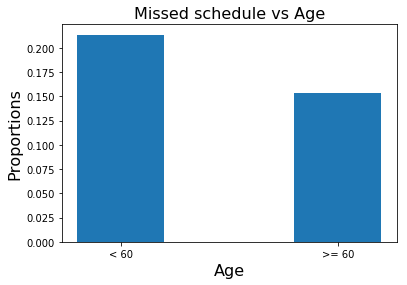

In [351]:
width = 0.4
loc = [1,2]
plt.bar(loc, [df_missed_l_prop, df_missed_h_prop], width)
plt.xlabel('Age', size = 16)
plt.ylabel('Proportions', size =16)
plt.title('Missed schedule vs Age', size = 16)
plt.xticks(loc, ['< 60', '>= 60']);

<font size=4><span style="color:red"> Since there seems to a correlation between the patients who missed the appoitment versus age, in the next section the correlation is explored in more detail. First the age is devided into four levels based on the value of 25%, 50% and 75% quartile.</font>

In [352]:
df.describe()

,patient_id,age,handcap,time_gap
count,"110,521.00","110,521.00","110,521.00","110,521.00"
mean,"147,490,629,021,863.69",37.09,0.02,10.18
std,"256,085,972,718,815.62",23.11,0.16,15.26
min,"39,217.00",0.00,0.00,0.00
25%,"4,172,457,111,246.00",18.00,0.00,0.00
50%,"31,731,846,175,313.00",37.00,0.00,4.00
75%,"94,389,629,939,367.00",55.00,0.00,15.00
max,"999,981,631,772,427.00",115.00,4.00,179.00


In [354]:
bin_edges = [0.00, 18.00, 37.00, 55.00, 115.00]
bin_names = ['0-18', '18-37', '37-55', '55-115']
df['age_group'] = pd.cut(df['age'], bin_edges, labels = bin_names)

In [439]:
age_missed_total = df.groupby(['no_show','age_group']).count().age['Yes']
age_total = df.groupby(['age_group']).count().age
age_missed_prop = missed_total / age_total
age_missed_prop

age_group
0-18                     0.23
18-37                    0.24
37-55                    0.20
55-115                   0.16
Name: age, dtype: float64

<font size=4><span style="color:red"> The proportion of the patients who missed the appointments are caluculated and plotted in different age range. It's found that for the age of 18-37 there's the highest value of missing appointments. This is reasonable as the people in this age range tend to be busier than the other age groups and there for will miss the appointments more easily. The age 55 and above has the lowest missing appointments proportions. This is also the same as what is found in the previous bar chart.</font>

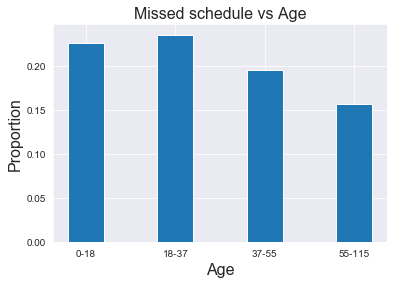

In [453]:
loc = [1,2,3,4]
width = 0.4
plt.bar(loc, age_missed_prop, width)
plt.xticks(loc, bin_names)
plt.xlabel('Age', size = 16)
plt.ylabel('Proportion', size = 16)
plt.title('Missed schedule vs Age', size = 16);

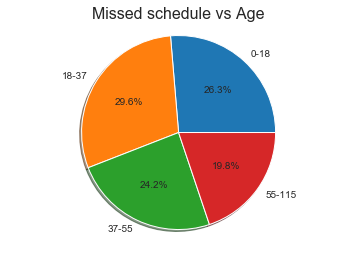

In [430]:
labels = ['0-18', '18-37', '37-55', '55-115']
sizes = age_missed_prop

fig1, ax1 = plt.subplots()
ax1.pie(age_missed_total, labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.title('Missed schedule vs Age', size = 16);

[reference4](https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html)

<font size=4><span style="color:red"> In the next section the gender among different age groups are analyzed and plotted as bar chart. It has been found in the previous missed schedule vs gender plot the there's no correlation between not showing to the appointments vs gender.  </font>

In [445]:
female_age = df.groupby(['no_show', 'gender', 'age_group']).count().age['Yes']['F']
male_age = df.groupby(['no_show', 'gender', 'age_group']).count().age['Yes']['M']

In [402]:
female_prop = female_age / age_total
male_prop = male_age / age_total

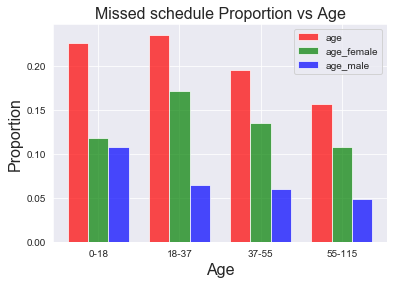

In [421]:
sns.set_style('darkgrid')

ind = np.arange(4) + 1
width = 0.25
age_bar = plt.bar(ind - width, age_missed_prop, width, alpha=.7, color = 'r', label = 'age')
age_female_bar = plt.bar(ind, female_prop, width, alpha=.7, color = 'g', label = 'age_female')
age_male_bar = plt.bar(ind + width, male_prop, width, alpha=.7, color = 'b', label = 'age_male')
labels = bin_names
plt.xticks(loc, bin_names)
plt.xlabel('Age', size = 16)
plt.ylabel('Proportion', size = 16)
plt.title('Missed schedule Proportion vs Age', size = 16)
plt.legend();

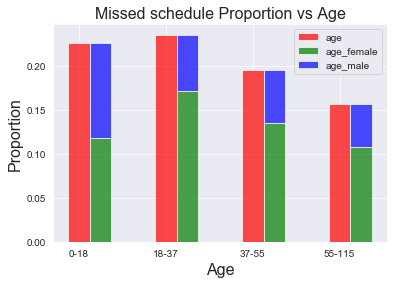

In [437]:
sns.set_style('darkgrid')

ind = np.arange(4) + 1
width = 0.25
p0 = plt.bar(ind, age_missed_prop, width, alpha=.7, color = 'r', label = 'age')
p1 = plt.bar(ind + width, female_prop,  width, alpha=.7, color = 'g', label = 'age_female')
p2 = plt.bar(ind + width, male_prop, width, alpha=.7, color = 'b', bottom=female_prop, label = 'age_male')

plt.xticks(loc, bin_names)
plt.xlabel('Age', size = 16)
plt.ylabel('Proportion', size = 16)
plt.title('Missed schedule Proportion vs Age', size = 16)
plt.legend();

 <font size=4><span style="color:red"> When the gender is plotted in different age groups, it is found that in the age group of 0-18 the female and male who missed the appointments is very close. Looking at the distribution of female and male in different age groups it's not surprising since male patients that fall in the age range of 0-18 is very close the the female patients.

In [452]:
female_age = df.groupby([ 'gender', 'age_group']).count().age['F']
male_age = df.groupby(['gender', 'age_group']).count().age['M']
print (female_age)
print (male_age)

age_group
0-18      13233
18-37     19820
37-55     18504
55-115    18558
Name: age, dtype: int64
age_group
0-18      12093
18-37      7428
37-55      8401
55-115     8945
Name: age, dtype: int64


<a id='conclusions'></a>
## Conclusions

<font size=4> 
1. In the first question the relation of days between scheduled_day and appointment_day on whether a patient will show up for the appointment is analyzed. It's clear that there's a positive correlation between the number of days and the proportion of patients who missed the appointment. 
<br><br>
Limitation: This conclusion/correlation can be affected by the neighbourhood (some neighbourhood might be further way than the others) or if the patients is handicapped or if the patients has receiver sms or not.
<br><br>
2. In the second question, the relation of age and gender on no_show is analyzed. First, it's found that the number of female who missed the appointment is much higher than male. However, as the number of female patients is much greater, this is not surprising. Comparision of the proportion of female and male who missed the appointment shows that those values are very close. This suggests that there's no correlation between gender and missing appointments. Second, It's fount that younger patients tend to miss the appointments than the older patients. The age group of 18-37 has the highest missing rates and the age group 55-115 has the lowest. Last, the gender in different age groups is analyzed. It's found that in the age group 0-18 the male and female has almost the same missing proportion, while in the other age groups the female has much higher missing rates than male. This is due to that the cardinal number of male and female in age group 0-18 is very close while in the other age groups the female patients cardinal number is much higher. 
<br><br>
Limitation: This conclusion however might be incorrect, as mentioned before a patient can make multiple appointments and does not show up. And these patients are counted multiple times when counting the number of female and male patients. As no efforts has been tried to seperate these patients, the conclusion might be inaccurate.</font>